In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc 
sns.set(style = "whitegrid")
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import datetime

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
# from sklearn.neural_network import MLPRegressor

import os
import	hashlib
from	sklearn.model_selection	import	train_test_split
from	sklearn.model_selection	import	StratifiedShuffleSplit
from	pandas.tools.plotting	import	scatter_matrix
from	sklearn.preprocessing	import	LabelEncoder 
from	sklearn.preprocessing	import	OneHotEncoder
from	sklearn.preprocessing	import	LabelBinarizer
from	sklearn.pipeline	import	FeatureUnion
!pip install wordcloud
from wordcloud import WordCloud

You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
train_set=pd.read_csv('agg_match_stats_1.csv', header=0, sep=',', quotechar='"')# read csv into df
train_set.dropna(inplace=True)
print(len(train_set))
train_set.head()

13824209


,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-11-26T01:47:01+0000,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,0.00000,2082.823000,0,0,fuckeddup,661.491,100001,50
1,2017-11-26T01:47:01+0000,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,0.00000,1118.815000,0,0,nojiongegg,741.359,100002,47
2,2017-11-26T01:47:01+0000,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,0.00000,25.533026,73,0,Darthmoca,83.255,100006,97
3,2017-11-26T01:47:01+0000,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,997.51000,1032.667850,345,3,gk1715,1144.816,100007,30
4,2017-11-26T01:47:01+0000,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,4296.35938,2300.323490,449,4,Angeliaboby,1112.843,100021,32


In [3]:
# filtered_df = train[(train['matchDuration'] >= 2000)]
#print(sum(train_set['player_survive_time'])/(len(train_set)))

In [4]:
def	split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [5]:
train, test = split_train_test(train_set, 0.2) 

In [6]:
print(len(train),"train +",len(test), "test") 

11059368 train + 2764841 test


In [159]:
test

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
4261224,2017-10-22T04:21:09+0000,95,2U4GBNA0YmkyjEf5RWz8M2ePLXnR2nx99s47B6l_G8eeXn...,tpp,1,0,0,6080.280000,1727.106450,245,2,Nmcwjl,1204.623,100061,24
3509912,2017-12-24T23:37:37+0000,93,2U4GBNA0Ymmh8X7SkZr7j8JQI5jDiIb85L6qNwhmDBVqms...,tpp,1,0,0,0.000000,552.061200,28,0,PhantomkLTz,482.823,100096,50
8499067,2017-10-28T15:03:27+0000,94,2U4GBNA0YmmaTMNP6CZjF0xkZeys9zckdGoN3gt78Z61HM...,tpp,1,0,0,0.000000,1285.297490,41,0,Krajen,952.506,100026,33
8860601,2017-12-15T06:45:15+0000,25,2U4GBNA0YmnZ-9ISdRZS6woarPCEv9zk4TzqLKBqa-uIJG...,tpp,4,0,2,2767.023440,3510.873000,307,3,ShuangShuangGod,1604.634,16,6
3148215,2017-11-29T06:04:53+0000,43,2U4GBNA0Ymk-xPpEkCKlVaC7PombaLJTk3_ovBIMoi_kIr...,tpp,2,0,3,3487.271240,3539.944580,275,3,Iceike,1875.229,27,3
13686024,2017-12-27T21:09:29+0000,43,2U4GBNA0YmmJB7OjBjd9bcYcyIrGAhzks2iFKobVVz9QwC...,tpp,2,0,0,0.000000,183.277466,0,0,GOODbye010,383.661,29,37
4491672,2017-11-11T02:13:07+0000,50,2U4GBNA0YmlAE-GTqApOkxtwVkcgVXQZCJh9NNHdgYXR9T...,tpp,2,0,0,0.000000,326.557037,0,0,haedynne,413.570,35,34
11766376,2017-11-08T19:50:17+0000,48,2U4GBNA0Ymmqq9y4Gqph5JhX_g0DH3eju-r_8khQqZFQqO...,tpp,2,0,1,2851.345000,1102.989870,300,1,BigDrOne,1366.960,48,11
9957297,2017-12-05T16:22:22+0000,27,2U4GBNA0Ymk573ere6ktORcmtIUjdJWHp756mPaRJuCMU6...,tpp,4,0,1,0.000000,199.837250,100,1,Ljleeee,232.900,5,22
13043258,2017-11-05T21:20:08+0000,90,2U4GBNA0YmlmCWJDv1MIe3HzAaJiLCWOLdVXGcg_pv1DDP...,tpp,1,0,0,0.000000,2278.263000,0,0,CaptainKnots14,621.460,100009,41


In [7]:
train_set.dropna(inplace=True)
print(len(train_set))
train_set.head()

13824209


,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-11-26T01:47:01+0000,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,0.00000,2082.823000,0,0,fuckeddup,661.491,100001,50
1,2017-11-26T01:47:01+0000,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,0.00000,1118.815000,0,0,nojiongegg,741.359,100002,47
2,2017-11-26T01:47:01+0000,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,0.00000,25.533026,73,0,Darthmoca,83.255,100006,97
3,2017-11-26T01:47:01+0000,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,997.51000,1032.667850,345,3,gk1715,1144.816,100007,30
4,2017-11-26T01:47:01+0000,97,2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...,tpp,1,0,0,4296.35938,2300.323490,449,4,Angeliaboby,1112.843,100021,32


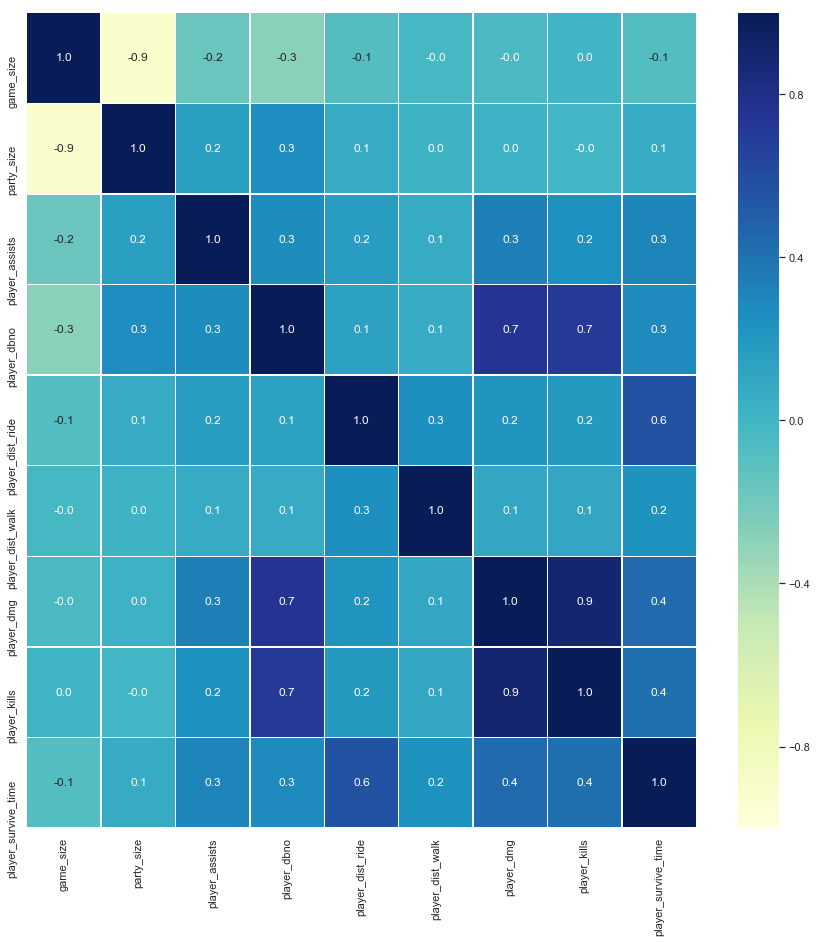

In [14]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.iloc[:,:-2].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu", vmin=-1, vmax =1)
plt.savefig('Corelation_all.png',format='png', dpi = 1500)
#files.download('Corelation_all.png')
plt.show()  

In [15]:
train['match_id'].value_counts()

2U4GBNA0YmkvCJhWBQQ6M4Lj2qqL9k-X6SKCC02ETmG568TALWyaiZ6Abq3oGjEV    93
2U4GBNA0Ymme1XOfa3mli3-cXlux2AJLdCqpts7iAgK3O2SYSpGKOfNe68CyF6Hv    92
2U4GBNA0YmkHiKc-PqkW3lQxEb7cIkSJUnqVdS_6B2FdCCbiY_YyLAexNdjN1Z1b    92
2U4GBNA0YmlDVtD9D5_BNyX29KUU0LcbQF2GIkrcgbgJFDt_PIG51YI6PAuepD_T    92
2U4GBNA0YmkQ993bUlo3cfrNWrBvs_AU_MhgNC7IjJfoUovRtyoKCgPjfHZBseiE    92
2U4GBNA0Yml0iAZqm7MmUdUbWGv-idzSUM9eainDYA2_9q9-WsRO7o7MApKQP0qh    92
2U4GBNA0Ymm6d8-KCr4WR5vrK-IqsntyzycDoOLeFdcUsiLX-i-x4E5NhI-b9l_d    91
2U4GBNA0YmkLYnJTReXmZdUV2Oc9Pezald3FmFvj7AMqdn9OtHMXUUiRqV1KXp3T    91
2U4GBNA0Ymnqu8aySAKth_HZnoKL9Zc6JZWuBKJs45NxNIHzVq8KnYAL_xMN1f4w    91
2U4GBNA0YmkQG_iPLjpDjWbtfDRFiSRNlPE-IG68o76F1W-Y-DbmQVuorlBTXUfn    91
2U4GBNA0YmkaSDPMdPfSaXzCgdMyFZVLZserIB_Fgh9yYka7Ly7bw0PFBBnjqWJ1    91
2U4GBNA0Ymk4uY70Y2AjyUOAQBgTY4GXLU1ZeZ5VN9sl-rw_NsZCaobh3dHUc9mW    91
2U4GBNA0YmmFlBTeMQKLpqPFm5qHlxBIvM-pzBIhXs7QmPYfau1OR1yNElXZsG18    91
2U4GBNA0YmmroohiANVqPqsWnyFTS8-96nQ9b7BqEX_JkkWB3TllTKLr5yDPBfbR    91
2U4GBN

In [8]:
#Mean of all matches
#train_set.groupby('match_id').mean()
train.groupby('match_id').mean()

,game_size,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,team_id,team_placement
match_id,,,,,,,,,,,
2U4GBNA0Ymk--2xnuFhXM2XOTQ1-vT4JaSt5qsPdeJimOjvddCBiTumAcdw1lXFT,90.0,1.0,0.046154,0.000000,772.303621,1034.166446,102.030769,0.738462,712.850215,100051.015385,49.123077
2U4GBNA0Ymk--7qt8xPyFW0ndWz7dIODaGxvZ65u0FW-26xh4B19pC08jYSAeLOK,96.0,1.0,0.039474,0.000000,1130.273109,1072.007493,118.552632,0.934211,695.287974,100047.723684,49.434211
2U4GBNA0Ymk--Ct3NwfrrRsDPvvn9aNF4vMGw1-q2uOygezUjSr9J2D6pMQ3KYsu,27.0,4.0,0.236842,0.907895,1809.894491,1182.888630,145.657895,0.960526,832.546961,13.894737,14.078947
2U4GBNA0Ymk--J_6mY26RDDvrD1K_0ywYSYCkVTPhgE8-OR8R69jnrdKL8Kmc0IY,25.0,4.0,0.260274,0.890411,1563.161768,1350.489705,142.698630,0.904110,856.279192,14.232877,12.424658
2U4GBNA0Ymk--T-M-GDSayRCsKlygyBNeYSrvcOmVGbvxic_e306bQr6Bq9qbuX6,27.0,4.0,0.388060,0.805970,752.934892,1179.086859,126.597015,0.880597,706.529522,14.910448,13.462687
2U4GBNA0Ymk--tZYxKnoQao7929ez8Ow40bbHUVCw_LDxG1i9l1Rdjn97b4AX_vc,48.0,2.0,0.256757,0.608108,875.895315,1041.862924,123.216216,0.878378,675.966946,25.216216,26.378378
2U4GBNA0Ymk--v1_ECbtPERSLSn-aBMYJMJCf8nGLpnzP66LnQPCxBFF6HiAtOMR,27.0,4.0,0.362500,0.987500,1366.249430,1370.201688,151.175000,0.912500,861.975462,13.037500,13.550000
2U4GBNA0Ymk-07D3_RvZVz9D6hMqTH1IZGX0RRwLfkSRJIoEfUWlIgCtCzfM2bHi,43.0,2.0,0.266667,0.666667,737.800721,1397.779763,126.700000,1.033333,775.462917,24.350000,21.383333
2U4GBNA0Ymk-0BL0fkbeaueSxuwgliYRTkhQPflufGBjs7i03Sbc73HPOtO-3iTE,24.0,4.0,0.285714,0.793651,370.526316,1210.992474,127.936508,0.920635,688.670032,15.650794,12.126984


In [9]:
pca = PCA()
X['match_mode'],_ = pd.factorize(X['match_mode'])

In [10]:
pca.fit(X)

In [11]:
def group_features(data):
  #Find the total players in the match that record is in by groupby on matchId and then counting the rows
  data['totalPlayers'] = data.groupby('match_id')['match_id'].transform('count')+1
  #Same thing for calculating the teamSize of the person in the record by groupby on groupId
#   data['teamSize'] = data.groupby('groupId')['groupId'].transform('count')

  #colsToNormalize = ['DBNOs','assists','boosts','damageDealt','headshotKills','heals','killStreaks','revives','roadKills','vehicleDestroys','weaponsAcquired','winPoints','killPlace','kills','killPoints','winPlace']


  #Create a normalized version of kills->killsNorm and damageDealtNorm to normalize the data for a match of 100 players. Since not all matches have exactly 100 players, we can't compare the
  #data from a match of 50 players to a match of 100 players.
  colsToNormalize = ['player_kills','player_dbno','player_dmg','player_assists','player_dist_ride','player_dist_walk']

  for x in colsToNormalize:
    data[str(x+'Norm')] = data[x]/data['totalPlayers']*100


In [12]:
def set_categorical(data):


  #Convert to categorical and assign a numeric value for each unique value
  data.match_id = data.match_id.astype('category')
  data.match_id = data.match_id.cat.codes

  data.team_id = data.team_id.astype('category')
  data.team_id = data.team_id.cat.codes


  data.match_mode = data.match_mode.astype('category')
  data.match_mode = data.match_mode.cat.codes

  data.player_name = data.player_name.astype('category')
  data.player_name = data.player_name.cat.codes



set_categorical(train)
set_categorical(test)

C:\Users\sweet\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [13]:
group_features(train)
group_features(test)

C:\Users\sweet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sweet\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [14]:
def feature_engineering(data):
  #Sum over the total distance travelled by the player including swim, ride and walk
  data['totalDistance'] = data.player_dist_ride+data.player_dist_walk
  data.totalDistance.fillna(0,inplace=True)
  data.totalDistance.replace(np.inf, 0, inplace=True)
    
  data['killsPerDistance'] = data.player_killsNorm/data.totalDistance
  data.killsPerDistance.fillna(0,inplace=True)
  data.killsPerDistance.replace(np.inf, 0, inplace=True)  
    
    

#Normalize the damage dealt by the distance travelled to equate different sizes of matches
  data['damageDealtPerDistance'] = data.player_dmgNorm / data.totalDistance
  data.damageDealtPerDistance.fillna(0,inplace=True)
  data.damageDealtPerDistance.replace(np.inf, 0, inplace=True)
    
feature_engineering(train)
feature_engineering(test)    

C:\Users\sweet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sweet\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\sweet\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [15]:
train.columns

Index(['date', 'game_size', 'match_id', 'match_mode', 'party_size',
       'player_assists', 'player_dbno', 'player_dist_ride', 'player_dist_walk',
       'player_dmg', 'player_kills', 'player_name', 'player_survive_time',
       'team_id', 'team_placement', 'totalPlayers', 'player_killsNorm',
       'player_dbnoNorm', 'player_dmgNorm', 'player_assistsNorm',
       'player_dist_rideNorm', 'player_dist_walkNorm', 'totalDistance',
       'killsPerDistance', 'damageDealtPerDistance'],
      dtype='object')

In [16]:
test.columns

Index(['date', 'game_size', 'match_id', 'match_mode', 'party_size',
       'player_assists', 'player_dbno', 'player_dist_ride', 'player_dist_walk',
       'player_dmg', 'player_kills', 'player_name', 'player_survive_time',
       'team_id', 'team_placement', 'totalPlayers', 'player_killsNorm',
       'player_dbnoNorm', 'player_dmgNorm', 'player_assistsNorm',
       'player_dist_rideNorm', 'player_dist_walkNorm', 'totalDistance',
       'killsPerDistance', 'damageDealtPerDistance'],
      dtype='object')

In [166]:
flag = True

In [167]:
corr

game_size                 1.000049
party_size                1.000062
player_assists            1.000184
player_dbno               1.000243
player_dist_ride          1.000348
player_dist_walk          1.000173
player_dmg                1.000121
player_kills              1.000091
player_survive_time       1.000661
team_id                   1.000110
team_placement            1.000495
totalPlayers              1.000916
player_killsNorm          1.000014
player_dbnoNorm           1.000237
player_dmgNorm            1.000052
player_assistsNorm        1.000177
player_dist_rideNorm      1.000345
player_dist_walkNorm      1.000172
totalDistance             1.000276
killsPerDistance          1.961827
damageDealtPerDistance    2.000000
Name: damageDealtPerDistance, dtype: float64

In [34]:
corr = train.iloc[:,:].corr().iloc[20]
for x in range(len(corr)):
  corr[x] = abs(corr[x])+1




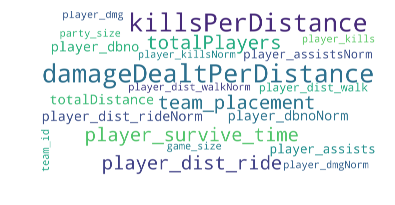

In [35]:
wordcloud = WordCloud(width=8000, height=4000,background_color="white")
wordcloud.generate_from_frequencies(frequencies=corr)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud1.png",format='png',dpi=1000)
plt.show()

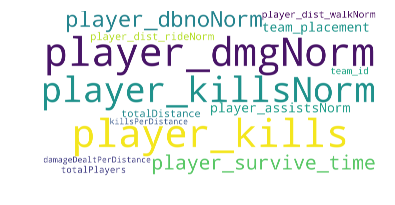

In [32]:
corr = train.iloc[:,9:].corr().iloc[0][1:]
for x in range(len(corr)):
  corr[x] = abs(corr[x])+1



wordcloud = WordCloud(width=8000, height=4000,background_color="white")
wordcloud.generate_from_frequencies(frequencies=corr)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud2.png",format='png',dpi=1000)
plt.show()

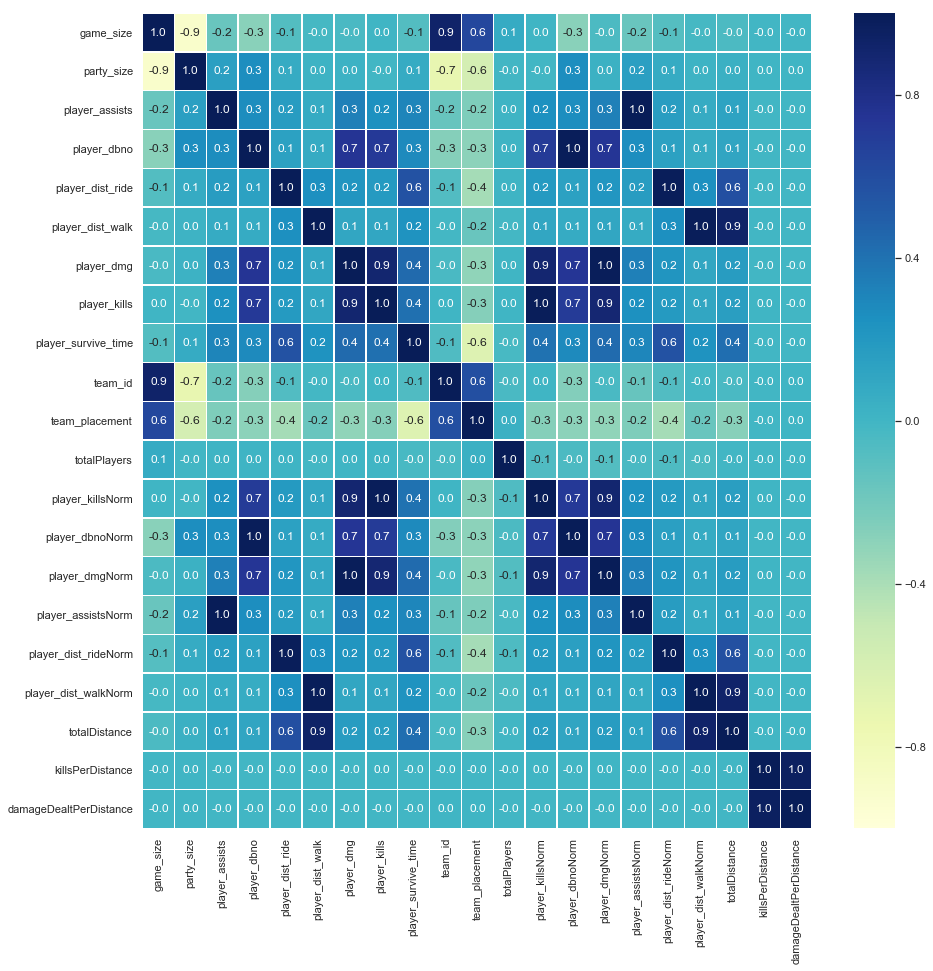

In [33]:
if flag==True:
  f,ax = plt.subplots(figsize=(15, 15))
  sns.heatmap(train.iloc[:,:].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu", vmin=-1, vmax =1)
  plt.show()

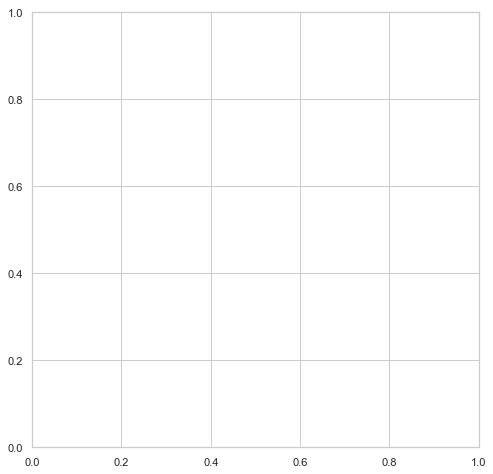

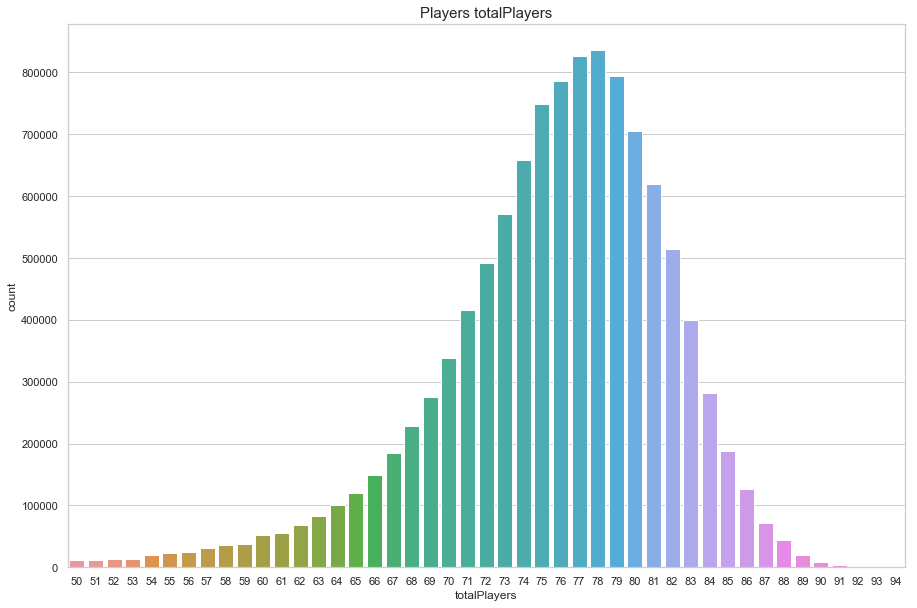

In [36]:
if flag==True:
  f,ax = plt.subplots(figsize=(8,8))
  highPlayer = train[train['totalPlayers']>49]
  plt.figure(figsize=(15,10))
  sns.countplot(highPlayer['totalPlayers'])
  plt.title("Players totalPlayers",fontsize=15)
  plt.savefig("totalplayers.png",dpi=600)
  plt.show()

In [17]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [18]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

C:\Users\sweet\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sweet\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sweet\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [21]:
train.shape

(11059368, 25)

In [22]:
test.shape

(2764841, 25)

In [23]:
y = train['player_survive_time']
X = train.drop(['player_survive_time','match_id','team_id','date'],axis=1)

y_test = test['player_survive_time']
X_test = test.drop(['player_survive_time','match_id','team_id','date'],axis=1)



In [24]:
X_test.shape[1]

21

In [25]:
X.shape[1]

21

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7)

len(X_train)

del train,test,X,y

#X_train = X
#y_train = y
gc.collect()

C:\Users\sweet\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0

In [38]:
def calculate_error_test(cl,name):
  print(name)
  print('Mean Squared Error for test data is {:.5f}'.format(mean_absolute_error(y_test, cl.predict(X_test))))
  print('R2 score is {:.2%}'.format(r2_score(y_test, cl.predict(X_test))))

In [39]:
def calculate_error(cl,name):
  print(name)
  print('Mean Squared Error for Validation is {:.5f}'.format(mean_absolute_error(y_val, cl.predict(X_val))))
  print('R2 score is {:.2%}'.format(r2_score(y_val, cl.predict(X_val))))

In [40]:
def runAllModels(X_train, Y_train):
        
    linear = LinearRegression(copy_X=True)
    linear.fit(X_train,Y_train)
    calculate_error(linear,"linear")
    calculate_error_test(linear,"linear")

    #ridge = Ridge(copy_X=True)
    #ridge.fit(X_train,Y_train)
    #calculate_error(ridge,"ridge")
    
    #lasso = Lasso(copy_X=True)
    #lasso.fit(X_train,Y_train)
    #calculate_error(lasso,"lasso")
    
    #elastic = ElasticNet(copy_X=True)
    #elastic.fit(X_train,Y_train)
    #calculate_error(elastic,"elastic")
    
    #ada = AdaBoostRegressor(learning_rate=0.8)
    #ada.fit(X_train,Y_train)
    #calculate_error(ada,"Adaboost")
    
    #GBR = GradientBoostingRegressor(learning_rate=0.8)
    #GBR.fit(X_train,Y_train)
    #calculate_error(GBR,"GBR")

    forest = RandomForestRegressor(n_estimators=10)
    forest.fit(X_train,Y_train)
    calculate_error(forest,"forest")
    calculate_error_test(forest,"forest")
    
    tree = DecisionTreeRegressor()
    tree.fit(X_train,Y_train)
    calculate_error(tree,"tree")
    calculate_error_test(tree,"tree")

In [41]:
runAllModels(X_train,y_train)

C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


linear


C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


Mean Squared Error for Validation is 240.41407


C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\sweet\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:546: RuntimeWarning: overflow encountered in square
  y_true, axis=0, weights=sample_weight)) ** 2).sum(axis=0,


R2 score is 100.00%
linear


C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


Mean Squared Error for test data is 339.31140


C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\sweet\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:546: RuntimeWarning: overflow encountered in square
  y_true, axis=0, weights=sample_weight)) ** 2).sum(axis=0,


R2 score is 100.00%


C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


forest


C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


Mean Squared Error for Validation is 104.13063


C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\sweet\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:546: RuntimeWarning: overflow encountered in square
  y_true, axis=0, weights=sample_weight)) ** 2).sum(axis=0,


R2 score is 100.00%
forest


C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


Mean Squared Error for test data is 142.69378


C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\sweet\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:546: RuntimeWarning: overflow encountered in square
  y_true, axis=0, weights=sample_weight)) ** 2).sum(axis=0,


R2 score is 100.00%


C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


tree


C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


Mean Squared Error for Validation is 136.30810


C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\sweet\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:546: RuntimeWarning: overflow encountered in square
  y_true, axis=0, weights=sample_weight)) ** 2).sum(axis=0,


R2 score is 100.00%
tree


C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


Mean Squared Error for test data is 195.22678


C:\Users\sweet\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\Users\sweet\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:546: RuntimeWarning: overflow encountered in square
  y_true, axis=0, weights=sample_weight)) ** 2).sum(axis=0,


R2 score is 100.00%
